In [1]:
import numpy as np
import os
import tensorflow as tf

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import SGD

# **Augmenting Training Images**

### *1. Color jitter*

### *2. Random-resized Cropping*

### *3. Horizontal Flipping of Random Images*

## **Color Jitter**

In [3]:
!mkdir colorjitter

In [4]:
def colorJitter(jitter_value):
  
  if not os.path.exists(col_path):
          os.mkdir(col_path)
          print("Directory " , col_path ,  " Created ")
  else:    
          print("Directory " , col_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f1))]

  
  for i in range(len(rfiles)):
    
    img = cv2.imread(train_path + "/" + rfiles[i])
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 defaul color code is BGR
    h,w,c = img.shape 

    noise = np.random.randint(0,jitter_value,(h, w)) # design jitter/noise here
    jitter = np.zeros_like(img)
    #for k in range (1,3):
    jitter[:,:,2] = noise  

    noise_added = cv2.add(img, jitter)
      
      #combined = np.vstack((img[:h/2,:,:], noise_added[h/2:,:,:]))
    label_in_file = rfiles[i].find(".")
    cv2.imwrite(col_path + "/" + rfiles[i][0:label_in_file] +"cj.jpg", noise_added)

In [5]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/drive/MyDrive/Data/Train/'+i
  col_path = '/content/colorjitter/colorjitter_'+i
  colorJitter(30)

Directory  /content/colorjitter/colorjitter_cardboard  Created 
Directory  /content/colorjitter/colorjitter_glass  Created 
Directory  /content/colorjitter/colorjitter_metal  Created 
Directory  /content/colorjitter/colorjitter_paper  Created 
Directory  /content/colorjitter/colorjitter_plastic  Created 
Directory  /content/colorjitter/colorjitter_trash  Created 


## **Random-resized Crop**

In [6]:
!mkdir randcrop_data

In [7]:
def get_random_crop(in_path, crop_height, crop_width):

  if not os.path.exists(randcrop_path):
          os.mkdir(randcrop_path)
          print("Directory " , randcrop_path ,  " Created ")
  else:    
          print("Directory " , randcrop_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])
    #resized=cv2.resize(img,(300,300)) #resizing images
      
    #print(img.shape)
    max_x = img.shape[1] - crop_width
    max_y = img.shape[0] - crop_height

    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)

    crop = img[y: y + crop_height, x: x + crop_width]
    cv2.imwrite(randcrop_path + "/" + rfiles[i], crop) #training data from randcrop path

In [8]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/colorjitter/colorjitter_'+i
  randcrop_path = '/content/randcrop_data/randcrop_data_'+i
  get_random_crop(train_path, 240, 240)

Directory  /content/randcrop_data/randcrop_data_cardboard  Created 
Directory  /content/randcrop_data/randcrop_data_glass  Created 
Directory  /content/randcrop_data/randcrop_data_metal  Created 
Directory  /content/randcrop_data/randcrop_data_paper  Created 
Directory  /content/randcrop_data/randcrop_data_plastic  Created 
Directory  /content/randcrop_data/randcrop_data_trash  Created 


## **Horizontal Flip**

In [9]:
!mkdir flip

In [10]:
def horizontalFlip(in_path):

  if not os.path.exists(flip_path):
          os.mkdir(flip_path)
          print("Directory " , flip_path ,  " Created ")
  else:    
          print("Directory " , flip_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])
    
    if i%2 == 0:
      flippedimage= cv2.flip(img, 1)
    else:
      flippedimage = img
      
      #combined = np.vstack((img[:h/2,:,:], noise_added[h/2:,:,:]))
    label_in_file = rfiles[i].find(".")
    cv2.imwrite(flip_path + "/" + rfiles[i][0:label_in_file] +"flip.jpg", flippedimage)

In [11]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/randcrop_data/randcrop_data_'+i
  flip_path = '/content/flip/flip_data'+i
  horizontalFlip(train_path) 

Directory  /content/flip/flip_datacardboard  Created 
Directory  /content/flip/flip_dataglass  Created 
Directory  /content/flip/flip_datametal  Created 
Directory  /content/flip/flip_datapaper  Created 
Directory  /content/flip/flip_dataplastic  Created 
Directory  /content/flip/flip_datatrash  Created 


# **Augmenting Validation Images**

### *1. Color jitter*

### *2. Center Cropping*

### *3. Horizontal Flipping of Random Images*

## **Color Jitter**

In [12]:
!mkdir colorjitter_val

In [13]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/drive/MyDrive/Data/Val/'+i
  col_path = '/content/colorjitter_val/colorjitter_val_'+i
  colorJitter(10)

Directory  /content/colorjitter_val/colorjitter_val_cardboard  Created 
Directory  /content/colorjitter_val/colorjitter_val_glass  Created 
Directory  /content/colorjitter_val/colorjitter_val_metal  Created 
Directory  /content/colorjitter_val/colorjitter_val_paper  Created 
Directory  /content/colorjitter_val/colorjitter_val_plastic  Created 
Directory  /content/colorjitter_val/colorjitter_val_trash  Created 


## **Center Crop**

In [14]:
!mkdir centercrop_data

In [15]:
def center_crop(in_path, out_path, dim=(240, 240)):

  if not os.path.exists(out_path):
          os.mkdir(out_path)
          print("Directory " , out_path ,  " Created ")
  else:    
          print("Directory " , out_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])

    width, height = img.shape[1], img.shape[0]
  #process crop width and height for max available dimension
    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2) 
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]

    cv2.imwrite(out_path + "/" + rfiles[i], crop_img) #validation in crop path, test in test_crop

In [16]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  val_path = '/content/colorjitter_val/colorjitter_val_'+i
  crop_path = '/content/centercrop_data/centercrop_data_'+i
  center_crop(val_path, crop_path)

Directory  /content/centercrop_data/centercrop_data_cardboard  Created 
Directory  /content/centercrop_data/centercrop_data_glass  Created 
Directory  /content/centercrop_data/centercrop_data_metal  Created 
Directory  /content/centercrop_data/centercrop_data_paper  Created 
Directory  /content/centercrop_data/centercrop_data_plastic  Created 
Directory  /content/centercrop_data/centercrop_data_trash  Created 


## **Horizontal Flip**

In [17]:
!mkdir flip_val

In [18]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/centercrop_data/centercrop_data_'+i
  flip_path = '/content/flip_val/flip_data_val_'+i
  horizontalFlip(train_path) 

Directory  /content/flip_val/flip_data_val_cardboard  Created 
Directory  /content/flip_val/flip_data_val_glass  Created 
Directory  /content/flip_val/flip_data_val_metal  Created 
Directory  /content/flip_val/flip_data_val_paper  Created 
Directory  /content/flip_val/flip_data_val_plastic  Created 
Directory  /content/flip_val/flip_data_val_trash  Created 


In [19]:
aug_path = '/content/flip'
center_path = '/content/flip_val'

In [20]:
aug_generator = ImageDataGenerator(rescale = 1/255)

aug_generator = aug_generator.flow_from_directory(aug_path,
                                              target_size = (300,300),
                                              batch_size = 16,
                                              class_mode = 'categorical')

labels = (aug_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1891 images belonging to 6 classes.
{'flip_datacardboard': 0, 'flip_dataglass': 1, 'flip_datametal': 2, 'flip_datapaper': 3, 'flip_dataplastic': 4, 'flip_datatrash': 5} 

{0: 'flip_datacardboard', 1: 'flip_dataglass', 2: 'flip_datametal', 3: 'flip_datapaper', 4: 'flip_dataplastic', 5: 'flip_datatrash'}


In [21]:
center_generator = ImageDataGenerator(rescale = 1/255)

center_generator = center_generator.flow_from_directory(center_path,
                                                    target_size = (300,300),
                                                    batch_size = 16,
                                                    class_mode = 'categorical')

labels = (center_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 293 images belonging to 6 classes.
{'flip_data_val_cardboard': 0, 'flip_data_val_glass': 1, 'flip_data_val_metal': 2, 'flip_data_val_paper': 3, 'flip_data_val_plastic': 4, 'flip_data_val_trash': 5} 

{0: 'flip_data_val_cardboard', 1: 'flip_data_val_glass', 2: 'flip_data_val_metal', 3: 'flip_data_val_paper', 4: 'flip_data_val_plastic', 5: 'flip_data_val_trash'}


In [22]:
test = '/content/drive/MyDrive/Data/Test'

In [23]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                target_size = (300,300),
                                                batch_size = 16,
                                                class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [24]:
print(test_generator.class_indices)
Labels = '\n'.join(sorted(test_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Base Model**

In [25]:
base_model=Sequential()

#Convolution blocks
base_model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
base_model.add(MaxPooling2D(pool_size=2)) 

base_model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
base_model.add(MaxPooling2D(pool_size=2)) 

base_model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
base_model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
base_model.add(Flatten())

base_model.add(Dense(32,activation='relu'))

base_model.add(Dropout(0.4))
base_model.add(Dense(6,activation='softmax'))

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

In [26]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [27]:
base_model.compile(optimizer = SGD(lr=0.01, momentum=0.9, decay=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
hist = base_model.fit(aug_generator,
          validation_data=center_generator,
          epochs=60,
          verbose=1)

Epoch 1/60
119/119 [==============================] - 15s 62ms/step - loss: 1.7722 - accuracy: 0.2243 - val_loss: 1.6758 - val_accuracy: 0.2935
Epoch 2/60
119/119 [==============================] - 7s 57ms/step - loss: 1.7049 - accuracy: 0.2428 - val_loss: 1.6356 - val_accuracy: 0.2935
Epoch 3/60
119/119 [==============================] - 7s 58ms/step - loss: 1.6451 - accuracy: 0.3091 - val_loss: 1.5822 - val_accuracy: 0.3413
Epoch 4/60
119/119 [==============================] - 7s 56ms/step - loss: 1.6130 - accuracy: 0.3315 - val_loss: 1.6115 - val_accuracy: 0.3174
Epoch 5/60
119/119 [==============================] - 7s 56ms/step - loss: 1.5930 - accuracy: 0.3277 - val_loss: 1.4739 - val_accuracy: 0.3891
Epoch 6/60
119/119 [==============================] - 7s 57ms/step - loss: 1.5769 - accuracy: 0.3481 - val_loss: 1.4634 - val_accuracy: 0.3857
Epoch 7/60
119/119 [==============================] - 7s 58ms/step - loss: 1.4920 - accuracy: 0.3592 - val_loss: 1.5166 - val_accuracy: 0.351

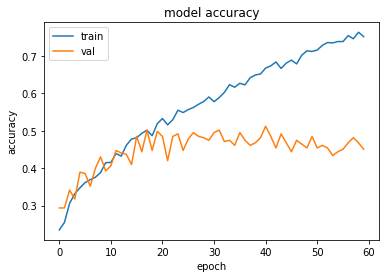

In [57]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
base_model.evaluate(test_generator)

22/22 [==============================] - 114s 5s/step - loss: 1.6664 - accuracy: 0.4373


[1.6664350032806396, 0.43731778860092163]

In [30]:
base_model.save('base.h5')

# **Augmentations for test images**

### *1. Color jitter*

### *2. Center Crop with values ((64x64), (128x128), (224x224))*

## **Color Jitter**

In [31]:
!mkdir colorjitter_test

In [32]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = '/content/drive/MyDrive/Data/Test/'+i
  col_path = '/content/colorjitter_test/colorjitter_test_'+i
  colorJitter(5)

Directory  /content/colorjitter_test/colorjitter_test_cardboard  Created 
Directory  /content/colorjitter_test/colorjitter_test_glass  Created 
Directory  /content/colorjitter_test/colorjitter_test_metal  Created 
Directory  /content/colorjitter_test/colorjitter_test_paper  Created 
Directory  /content/colorjitter_test/colorjitter_test_plastic  Created 
Directory  /content/colorjitter_test/colorjitter_test_trash  Created 


## **Center Crop (64x64)**

In [33]:
!mkdir centercrop64

In [34]:
def center_crop_test(in_path, out_path, dim):

  if not os.path.exists(out_path):
          os.mkdir(out_path)
          print("Directory " , out_path ,  " Created ")
  else:    
          print("Directory " , out_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])

    width, height = img.shape[1], img.shape[0]
  #process crop width and height for max available dimension
    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2) 
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]

    cv2.imwrite(out_path + "/" + rfiles[i], crop_img) #validation in crop path, test in test_crop

In [35]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  test_path = '/content/colorjitter_test/colorjitter_test_'+i
  crop_path = '/content/centercrop64/centercrop_64_'+i
  center_crop_test(test_path, crop_path, (64,64))

Directory  /content/centercrop64/centercrop_64_cardboard  Created 
Directory  /content/centercrop64/centercrop_64_glass  Created 
Directory  /content/centercrop64/centercrop_64_metal  Created 
Directory  /content/centercrop64/centercrop_64_paper  Created 
Directory  /content/centercrop64/centercrop_64_plastic  Created 
Directory  /content/centercrop64/centercrop_64_trash  Created 


## **Center Crop (128x128)**

In [36]:
!mkdir centercrop128

In [37]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  test_path = '/content/colorjitter_test/colorjitter_test_'+i
  crop_path = '/content/centercrop128/centercrop_128_'+i
  center_crop_test(test_path, crop_path, (128,128))

Directory  /content/centercrop128/centercrop_128_cardboard  Created 
Directory  /content/centercrop128/centercrop_128_glass  Created 
Directory  /content/centercrop128/centercrop_128_metal  Created 
Directory  /content/centercrop128/centercrop_128_paper  Created 
Directory  /content/centercrop128/centercrop_128_plastic  Created 
Directory  /content/centercrop128/centercrop_128_trash  Created 


## **Center Crop (224x224)**

In [38]:
!mkdir centercrop224

In [39]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  test_path = '/content/colorjitter_test/colorjitter_test_'+i
  crop_path = '/content/centercrop224/centercrop_224_'+i
  center_crop_test(test_path, crop_path, (224,224))

Directory  /content/centercrop224/centercrop_224_cardboard  Created 
Directory  /content/centercrop224/centercrop_224_glass  Created 
Directory  /content/centercrop224/centercrop_224_metal  Created 
Directory  /content/centercrop224/centercrop_224_paper  Created 
Directory  /content/centercrop224/centercrop_224_plastic  Created 
Directory  /content/centercrop224/centercrop_224_trash  Created 


# **Fine Tuning**

## *Network Surgery*

In [40]:
from keras.models import Model
new_model = base_model.output

new_model = BatchNormalization()(new_model)

new_model = Dense(6, activation="softmax")(new_model)

model = Model(inputs=base_model.input, outputs=new_model)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0     

## *Freeze all of the CONV layers*

In [41]:
for layer in base_model.layers:
	layer.trainable = False

In [42]:
aug_path = '/content/flip'
center_path = '/content/flip_val'

In [43]:
aug_generator = ImageDataGenerator(rescale = 1/255)

aug_generator = aug_generator.flow_from_directory(aug_path,
                                              target_size = (300,300),
                                              batch_size = 8,
                                              class_mode = 'categorical')

labels = (aug_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1891 images belonging to 6 classes.
{'flip_datacardboard': 0, 'flip_dataglass': 1, 'flip_datametal': 2, 'flip_datapaper': 3, 'flip_dataplastic': 4, 'flip_datatrash': 5} 

{0: 'flip_datacardboard', 1: 'flip_dataglass', 2: 'flip_datametal', 3: 'flip_datapaper', 4: 'flip_dataplastic', 5: 'flip_datatrash'}


In [45]:
center_generator = ImageDataGenerator(rescale = 1/255)

center_generator = center_generator.flow_from_directory(center_path,
                                                    target_size = (300,300),
                                                    batch_size = 8,
                                                    class_mode = 'categorical')

labels = (center_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 293 images belonging to 6 classes.
{'flip_data_val_cardboard': 0, 'flip_data_val_glass': 1, 'flip_data_val_metal': 2, 'flip_data_val_paper': 3, 'flip_data_val_plastic': 4, 'flip_data_val_trash': 5} 

{0: 'flip_data_val_cardboard', 1: 'flip_data_val_glass', 2: 'flip_data_val_metal', 3: 'flip_data_val_paper', 4: 'flip_data_val_plastic', 5: 'flip_data_val_trash'}


In [46]:
model.compile(optimizer = SGD(lr=0.001, momentum=0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
hist2 = model.fit(aug_generator,
          validation_data=center_generator,
          epochs=60,
          verbose=1)

Epoch 1/60
237/237 [==============================] - 6s 25ms/step - loss: 1.9069 - accuracy: 0.2067 - val_loss: 1.5874 - val_accuracy: 0.4334
Epoch 2/60
237/237 [==============================] - 6s 24ms/step - loss: 1.2579 - accuracy: 0.6165 - val_loss: 1.5483 - val_accuracy: 0.4539
Epoch 3/60
237/237 [==============================] - 6s 24ms/step - loss: 1.0624 - accuracy: 0.6761 - val_loss: 1.5968 - val_accuracy: 0.4505
Epoch 4/60
237/237 [==============================] - 6s 24ms/step - loss: 0.9535 - accuracy: 0.6842 - val_loss: 1.6120 - val_accuracy: 0.4539
Epoch 5/60
237/237 [==============================] - 6s 24ms/step - loss: 0.9406 - accuracy: 0.7005 - val_loss: 1.6499 - val_accuracy: 0.4471
Epoch 6/60
237/237 [==============================] - 6s 24ms/step - loss: 0.9102 - accuracy: 0.6964 - val_loss: 1.6645 - val_accuracy: 0.4539
Epoch 7/60
237/237 [==============================] - 6s 25ms/step - loss: 0.9383 - accuracy: 0.6897 - val_loss: 1.6687 - val_accuracy: 0.4471

In [ ]:
test = '/content/centercrop64'

In [48]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                target_size = (300,300),
                                                batch_size = 8,
                                                class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


## **Evaluating for (64x64) test crops**

In [49]:
model.evaluate(test_generator)

43/43 [==============================] - 2s 41ms/step - loss: 1.8449 - accuracy: 0.4198


[1.8448598384857178, 0.41982507705688477]

## **Evaluating for (128x128) test crops**

In [50]:
test = '/content/centercrop128'

In [51]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                target_size = (300,300),
                                                batch_size = 8,
                                                class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'centercrop_128_cardboard': 0, 'centercrop_128_glass': 1, 'centercrop_128_metal': 2, 'centercrop_128_paper': 3, 'centercrop_128_plastic': 4, 'centercrop_128_trash': 5} 

{0: 'centercrop_128_cardboard', 1: 'centercrop_128_glass', 2: 'centercrop_128_metal', 3: 'centercrop_128_paper', 4: 'centercrop_128_plastic', 5: 'centercrop_128_trash'}


In [52]:
model.evaluate(test_generator)

43/43 [==============================] - 1s 16ms/step - loss: 1.9087 - accuracy: 0.4169


[1.9086743593215942, 0.4169096350669861]

## **Evaluating for (224x224) test crops**

In [53]:
test = '/content/centercrop224'

In [54]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                target_size = (300,300),
                                                batch_size = 8,
                                                class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'centercrop_224_cardboard': 0, 'centercrop_224_glass': 1, 'centercrop_224_metal': 2, 'centercrop_224_paper': 3, 'centercrop_224_plastic': 4, 'centercrop_224_trash': 5} 

{0: 'centercrop_224_cardboard', 1: 'centercrop_224_glass', 2: 'centercrop_224_metal', 3: 'centercrop_224_paper', 4: 'centercrop_224_plastic', 5: 'centercrop_224_trash'}


In [55]:
model.evaluate(test_generator)

43/43 [==============================] - 1s 20ms/step - loss: 1.7935 - accuracy: 0.4402


[1.7934978008270264, 0.4402332305908203]

In [56]:
model.save('model.h5')